<div class="alert  alert-info" style="text-align:center">
<h1 ><strong>Hanan Mo. Alnakhal</strong></h1>
    <h3 > student Id: <b> 220220202 </b></h3>
<h3 > 17<sup>th</sup> of Jan 2025 </h3>
</div>

## **Importing the libraries**

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## **Define variables *function***

In [3]:
def define_variables():

    print("Defining linguistic variables and their fuzzy sets...")

    intact_col = ctrl.Antecedent(np.arange(0, 200,1), 'intact_col')
    intact_col['none']=fuzz.trapmf(intact_col.universe,[0,0,1,2])
    intact_col['low']=fuzz.trapmf(intact_col.universe, [0, 3, 6,10])
    intact_col['medium']=fuzz.trapmf(intact_col.universe, [7,12, 15, 20])
    intact_col['high']=fuzz.smf(intact_col.universe, 15, 20)

    tilt=ctrl.Antecedent(np.arange(0, 91,1),'tilt')
    tilt['exist']=fuzz.trapmf(tilt.universe,[1,1,90,90])

    ruble_percentage=ctrl.Antecedent(np.arange(1, 101,1),'ruble_percentage')
    ruble_percentage['none']= fuzz.trapmf(ruble_percentage.universe,[0,0,1,2])
    ruble_percentage['light']= fuzz.trapmf(ruble_percentage.universe, [1, 3, 9,10])
    ruble_percentage['moderate'] = fuzz.gauss2mf(ruble_percentage.universe,10,3,20,10)
    ruble_percentage['heavy'] = fuzz.gauss2mf(ruble_percentage.universe,30,10,50,10)
    ruble_percentage['massive']  = fuzz.smf(ruble_percentage.universe, 50, 70)

    building_area = ctrl.Antecedent(np.arange(0, 3000, 1), 'building_area')
    building_area['small']=fuzz.trapmf(building_area.universe, [0, 0, 250,500])
    building_area['medium']=fuzz.trapmf(building_area.universe, [0,500, 800, 1050])
    building_area['large']= fuzz.smf(building_area.universe,750, 1200)

    building_hight=ctrl.Antecedent(np.arange(1, 21,1),'building_hight')
    building_hight['short'] = fuzz.trapmf(building_hight.universe, [0, 1, 2,3])
    building_hight['average'] = fuzz.gauss2mf(building_hight.universe,3,2,5,2)
    building_hight['tall'] = fuzz.smf(building_hight.universe, 5, 8)
    
    building_age = ctrl.Antecedent(np.arange(0, 120, 1),'building_age')
    building_age['new'] = fuzz.trapmf(building_age.universe, [0, 0,5, 15])
    building_age['middile'] = fuzz.trapmf(building_age.universe, [10, 20, 30, 35])
    building_age["old"] = fuzz.trapmf(building_age.universe, [30, 40, 50, 55])
    building_age['very old'] = fuzz.trapmf(building_age.universe, [50, 70, 120, 120])
    
    damage_per = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'damage')
    damage_per['none']= fuzz.trapmf(damage_per.universe,[0,0,.05,.18])
    damage_per['light']= fuzz.trimf(damage_per.universe, [.05, .18, .31])
    damage_per['moderate'] = fuzz.trimf(damage_per.universe,[.18, .31, .55])
    damage_per['heavy'] = fuzz.trimf(damage_per.universe,[.31, .55, .88])
    damage_per['severe']  = fuzz.trapmf(damage_per.universe, [.55, .75,1,1])

    damage = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'damage_out')
    damage['none']= fuzz.trapmf(damage.universe,[0,0,.05,.18])
    damage['light']= fuzz.trimf(damage.universe, [.05, .18, .31])
    damage['moderate'] = fuzz.trimf(damage.universe,[.18, .31, .55])
    damage['heavy'] = fuzz.trimf(damage.universe,[.31, .55, .88])
    damage['severe']  = fuzz.trapmf(damage.universe, [.55, .75,1,1])
    
    habitability = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'habitability')
    habitability['dangrouse']= fuzz.trapmf(habitability.universe,[0,0,.25,.45])
    habitability['prohibited']= fuzz.trimf(habitability.universe, [.25, .50, .75])
    habitability['restricted'] = fuzz.trimf(habitability.universe,[.50, .75, 1])
    habitability['usable']  = fuzz.trapmf(habitability.universe, [.75, .85,1,1])

    reparability = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'reparability')
    reparability['Possible demolition']= fuzz.trapmf(reparability.universe,[0,0,.25,.45])
    reparability['Strengthening']= fuzz.trimf(reparability.universe, [.25, .50, .75])
    reparability['Reparation'] = fuzz.trimf(reparability.universe,[.50, .75, 1])
    reparability['Not any or minor']  = fuzz.trapmf(reparability.universe, [.75, .85,1,1])

    print("Linguistic variables and fuzzy sets defined successfully.")
    return (intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,
            building_age,damage,habitability,reparability)
intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,building_age,damage,habitability,reparability=define_variables()


Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.


## **Construct Rules *function***

In [4]:
def construct_rules():
    print("Constructing fuzzy rules...")
    #-----------------------------------------------------------------------Rule Base1 for getting the damege-----------------------
    rule1 = ctrl.Rule(tilt['exist']|intact_col['none'], damage_per['severe'])

    rule2 = ctrl.Rule(~tilt['exist']& intact_col['low'] & building_area['small'], damage_per['moderate'])
    rule3 = ctrl.Rule(~tilt['exist']& intact_col['low'] & building_area['medium'], damage_per['heavy'])
    rule4 = ctrl.Rule(intact_col['low'] & building_area['large'], damage_per['severe'])
    rule5 = ctrl.Rule(~tilt['exist']& intact_col['medium'] & building_area['small'], damage_per['light'])
    rule6 = ctrl.Rule(~tilt['exist']& intact_col['medium'] & building_area['medium'], damage_per['moderate'])
    rule7 = ctrl.Rule(~tilt['exist']& intact_col['medium'] & building_area['large'], damage_per['heavy'])
    rule8 = ctrl.Rule(~tilt['exist']& intact_col['high'] & building_area['small'], damage_per['light'])
    rule9 = ctrl.Rule(~tilt['exist']& intact_col['high'] & building_area['medium'], damage_per['light'])
    rule10 = ctrl.Rule(~tilt['exist']& intact_col['high'] & building_area['large'], damage_per['moderate'])

    rule11 = ctrl.Rule(tilt['exist'], damage_per['severe'])   
    #added these rules to add a wight for this feature
    rule47 = ctrl.Rule(tilt['exist'] & (ruble_percentage['light']|ruble_percentage['moderate']|ruble_percentage['heavy']), damage_per['severe'])
    rule48 = ctrl.Rule(tilt['exist'] & (building_area['small']|building_area['medium']|building_area['large']), damage_per['severe'])
    rule49 = ctrl.Rule(tilt['exist'] & (building_hight['short'] |building_hight['average']|building_hight['tall']), damage_per['severe'])

    rule12 = ctrl.Rule(ruble_percentage['massive'], damage_per['severe'])
    rule13 = ctrl.Rule(~tilt['exist']&  ruble_percentage['none'], damage_per['none'])
    
    rule14 = ctrl.Rule(~tilt['exist']& ruble_percentage['light'] & building_area['small'], damage_per['moderate'])
    rule15 = ctrl.Rule(~tilt['exist']& ruble_percentage['light'] & building_area['medium'] , damage_per['light'])
    rule16 = ctrl.Rule(~tilt['exist']& ruble_percentage['light'] & building_area['large'] , damage_per['light'])
    rule17 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate'] & building_area['small'] , damage_per['heavy'])
    rule18 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate'] & building_area['medium'], damage_per['moderate'])
    rule19 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate'] & building_area['large'] , damage_per['light'])
    rule20 = ctrl.Rule(ruble_percentage['heavy']  & building_area['small'] , damage_per['severe'])
    rule21 = ctrl.Rule(~tilt['exist']& ruble_percentage['heavy']  & building_area['medium'] , damage_per['heavy'])
    rule22 = ctrl.Rule(~tilt['exist']& ruble_percentage['heavy']  & building_area['large'] , damage_per['moderate'])

    rule23 = ctrl.Rule(~tilt['exist']& ruble_percentage['light']  & building_hight['short'] , damage_per['light'])
    rule24 = ctrl.Rule(~tilt['exist']& ruble_percentage['light']  & building_hight['average'] , damage_per['moderate'])
    rule25 = ctrl.Rule(~tilt['exist']& ruble_percentage['light']  & building_hight['tall'] , damage_per['moderate'])
    rule26 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate']  & building_hight['short'] , damage_per['moderate'])
    rule27 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate']  & building_hight['average'] , damage_per['moderate'])
    rule28 = ctrl.Rule(~tilt['exist']& ruble_percentage['moderate']  & building_hight['tall'] , damage_per['heavy'])
    rule29 = ctrl.Rule(~tilt['exist']& ruble_percentage['heavy']  & building_hight['short'] , damage_per['heavy'])
    rule30 = ctrl.Rule(~tilt['exist']& ruble_percentage['heavy']  & building_hight['average'] , damage_per['heavy'])
    rule31 = ctrl.Rule(ruble_percentage['heavy']  & building_hight['tall'] , damage_per['severe'])

    #-----------------------------------------------------------------------Rule Base2 for getting the recommendations-----------------------
    #---------------------------------------Habitability
    rule32 = ctrl.Rule(damage['none'], habitability['usable'])
    rule33 = ctrl.Rule(damage['severe'], habitability['dangrouse'])
    rule34 = ctrl.Rule(damage['light'] & building_age['very old'], habitability['restricted'])
    rule35 = ctrl.Rule(damage['light'] & ~(building_age['very old']), habitability['usable'])
    rule36 = ctrl.Rule(damage['moderate'] & building_age['very old'], habitability['prohibited'])
    rule37 = ctrl.Rule(damage['moderate'] & ~(building_age['very old']), habitability['restricted'])
    rule38 = ctrl.Rule(damage['heavy'] & building_age['very old'], habitability['dangrouse'])
    rule39 = ctrl.Rule(damage['heavy'] & ~(building_age['very old']), habitability['prohibited'])
    #---------------------------------------Reparability
    rule40 = ctrl.Rule(damage['severe'], reparability['Possible demolition'])
    rule41 = ctrl.Rule((damage['none']|damage['light'] | damage['moderate']) & building_age['very old'], reparability['Strengthening'])
    rule42 = ctrl.Rule(damage['heavy'] & building_age['very old'], reparability['Possible demolition'])
    rule43 = ctrl.Rule(damage['heavy'] & ~(building_age['very old']), reparability['Strengthening'])
    rule44 = ctrl.Rule((building_age['middile'] | building_age['new']) & (damage['none']|damage['light'] ), reparability['Not any or minor'])
    rule45 = ctrl.Rule(damage['moderate'] & ~(building_age['very old']), reparability['Reparation'])
    rule46 = ctrl.Rule((damage['none']|damage['light']) & building_age["old"], reparability['Reparation'])
    

    print("Complete fuzzy rule base constructed successfully.\n","-"*50)
    return [
        rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
        rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
        rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25,
        rule26, rule27,rule28, rule29, rule30, rule31, rule47, rule48, rule49,
        
        rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,
        rule40,rule41,rule42,rule43,rule44,rule45,rule46]

## **Creating the fuzzy system *function***

In [5]:
def create_fuzzy_system(rules):
    print("Creating the fuzzy expert system...")
    Fuzzy_sys = ctrl.ControlSystemSimulation(ctrl.ControlSystem(rules))
    print("Fuzzy expert system created successfully.")
    print("-"*50)
    return Fuzzy_sys

## **creating 2 fuzzy systems**

1. ####  intact_col + tilt + ruble_percentage + building_area + building_hight--->**`damage_sim`**--> *damage percentage*
2. ####  *damage percentage* + building_age---> **`results_sim`**--->habitability+reparability

In [6]:
if __name__=="__main__":
    print("Building a Fuzzy Expert System for damage Assessment...")
    #---1---definig variebles-------------------
    intact_col,tilt, ruble_percentage, building_area, building_hight,damage_per,building_age,damage,habitability,reparability=define_variables()
    #---2---adding rules------------------------
    rules = construct_rules()
    #---3---creating the fuzzy sim--------------
    damage_sim = create_fuzzy_system(rules[:34])
    results_sim = create_fuzzy_system(rules[35:])

    print("Fuzzy Expert System completed executing.")

Building a Fuzzy Expert System for damage Assessment...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Complete fuzzy rule base constructed successfully.
 --------------------------------------------------
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
--------------------------------------------------
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
--------------------------------------------------
Fuzzy Expert System completed executing.


## **Testing both systems**

0.3811403828247311
{'moderate': 0.703581738230287, 'heavy': 0.2964182617697129}


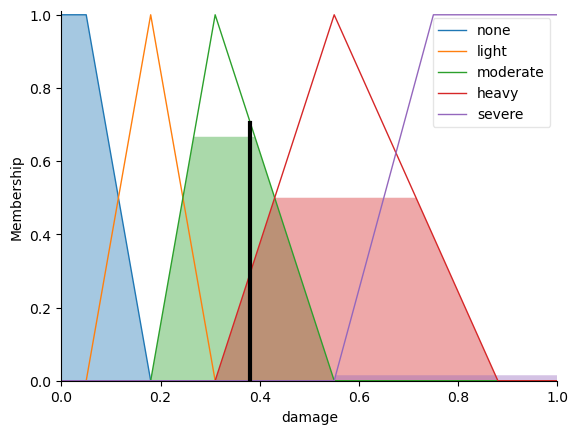

In [17]:
# damage_sim
#Inputs: building_hight , ruble_percentage , building_area , intact_col
damage_sim.input['building_hight'] = 3 
damage_sim.input['ruble_percentage']=.2
damage_sim.input['building_area'] = 250
damage_sim.input['intact_col'] = 2
damage_sim.input['tilt'] = 0
damage_sim.compute()
print(damage_sim.output.get('damage'))
damage_per.view(sim=damage_sim)
# fuzz.interp_membership(damage_per.universe, damage_per['moderate'].mf, damage_sim.output.get('damage'))
result={}
for x in ["none", "light" ,"moderate", "heavy" ,"severe"]:
    y=fuzz.interp_membership(damage_per.universe, damage_per[x].mf, damage_sim.output.get('damage'))
    if y>0:
        result[x]=y
print(result)

In [16]:
# results_sim
# inputs: damage_out , building_age
# output: reparability + habitability
results_sim.input['damage_out']=damage_sim.output.get('damage')
results_sim.input['building_age']=60
results_sim.compute()
print(results_sim.output)
# habitability['dangrouse'].view(sim=results_sim)
habitability['dangrouse'].mf

{'habitability': 0.5215126022001642, 'reparability': 0.5215126022001642, 'damage': 0.14485979521637832}


array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 0.5 , 0.25, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### case2

{'habitability': 0.23338252331187365, 'reparability': 0.23338252331187365, 'damage': 0.8202380952380953}


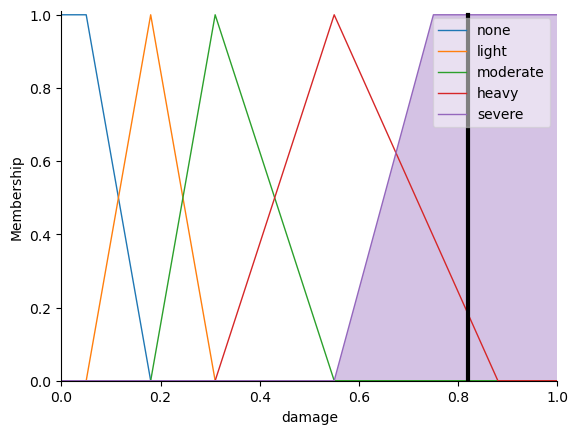

In [9]:
damage_sim.input['building_hight'] = 3 
damage_sim.input['ruble_percentage']=.2
damage_sim.input['building_area'] = 250
damage_sim.input['intact_col'] = 10
damage_sim.input['tilt'] = 5
damage_sim.compute()
results_sim.input['damage_out']=damage_sim.output.get('damage')
results_sim.input['building_age']=40
results_sim.compute()
results_sim.output['damage']= damage_sim.output.get('damage')
print(results_sim.output)
damage_per.view(sim=damage_sim)

### case3

{'habitability': 0.8922032167815543, 'reparability': 0.75, 'damage': 0.14485979521637832}


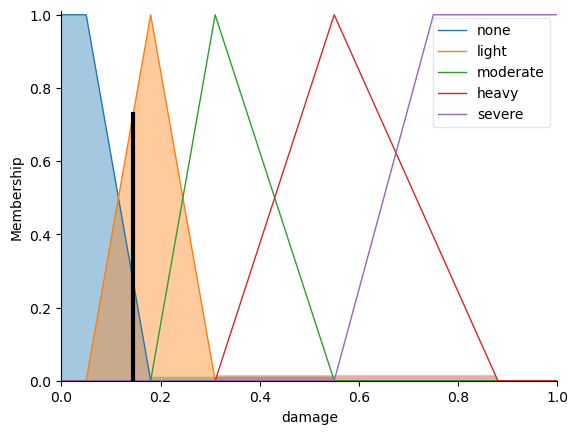

In [10]:
damage_sim.input['building_hight'] = 1 
damage_sim.input['ruble_percentage']=.2
damage_sim.input['building_area'] = 500
damage_sim.input['intact_col'] = 30
damage_sim.input['tilt'] = 0
damage_sim.compute()
results_sim.input['damage_out']=damage_sim.output.get('damage')
results_sim.input['building_age']=40
results_sim.compute()
results_sim.output['damage']= damage_sim.output.get('damage')
print(results_sim.output)
damage_per.view(sim=damage_sim)

# ***3d*** **PLOTS**+**rules** demonstration

## **damage**

### hight vs visible Damage:
- no tilt
- 10col-> medium 
- area 500 squerd meters -> medium

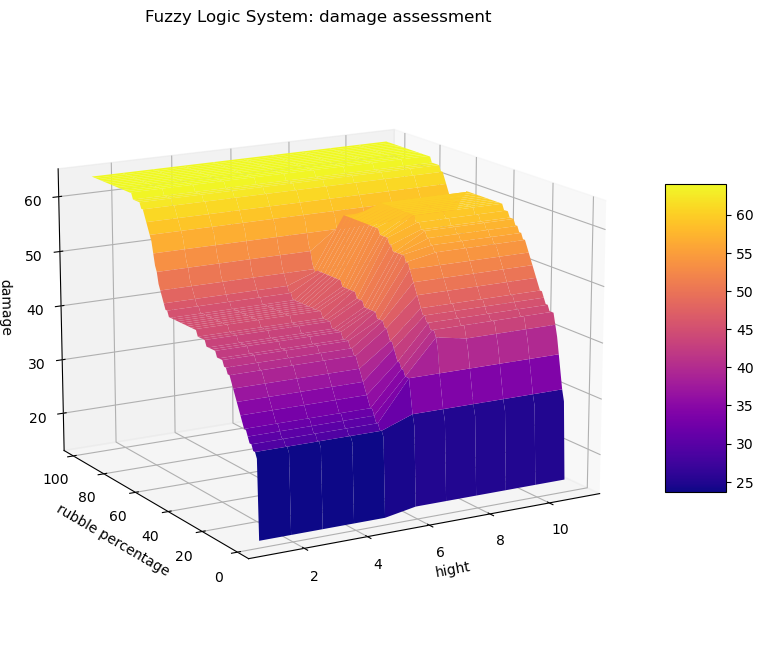

In [11]:
def hight_vs_Rubble(area=500,col=30,tilt=0):
    building_hight_range = np.arange(1, 12,1)
    rub_per = np.arange(1, 100,1)
    rub_per, building_hight_range = np.meshgrid(rub_per, building_hight_range)
    output = np.empty_like(building_hight_range)

    for i in range(building_hight_range.shape[0]):
        for j in range(building_hight_range.shape[1]):
            damage_sim.input['building_hight'] = building_hight_range[i,j]
            damage_sim.input['ruble_percentage'] = rub_per[i,j]

            damage_sim.input['building_area'] = area
            damage_sim.input['intact_col'] =col
            damage_sim.input['tilt'] = tilt
            damage_sim.compute()
            # print(damage_sim.output.get('damage'))
            output[i,j]= damage_sim.output.get('damage')*100 #to normalize the z axis when plotting and to make it more clear

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(building_hight_range,rub_per, output, cmap='plasma') 
    ax.azim =240
    ax.elev = 15
    ax.set_xlabel('hight')
    ax.set_ylabel('rubble percentage')
    ax.set_zlabel('damage')
    ax.set_title('Fuzzy Logic System: damage assessment')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
hight_vs_Rubble()

> as we can see when the hight of the building increases the damage become more criticle 

### area vs visible Damage:
- hight-> 2 floors
- 30col-> good 
- tilt -> 0

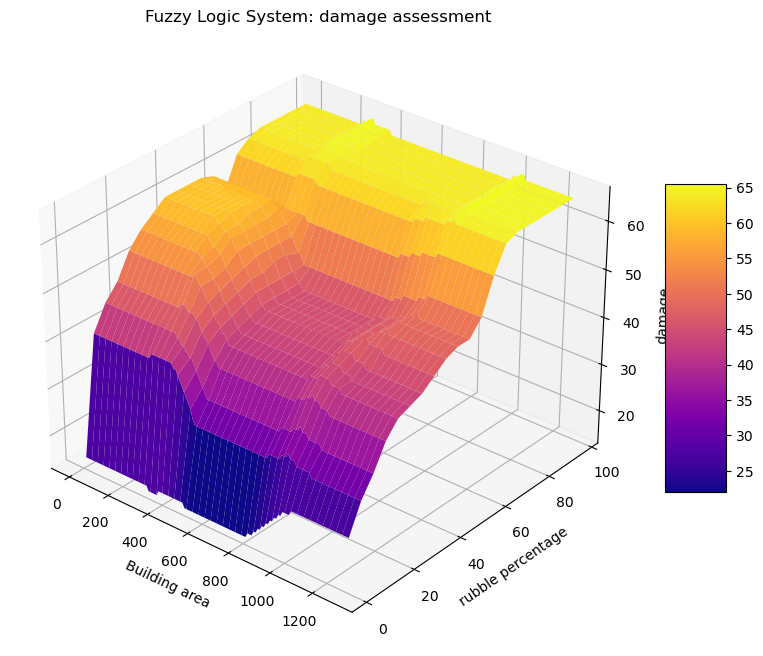

In [100]:
def area_vs_Rubble(hight=4,col=30,tilt=0):
    buildingArea = np.arange(0, 1300, 10)
    rub_per = np.arange(1, 100,5)
    rub_per, buildingArea = np.meshgrid(rub_per, buildingArea)
    output = np.empty_like(buildingArea)

    for i in range(rub_per.shape[0]):
        for j in range(rub_per.shape[1]):
            damage_sim.input['building_area']= buildingArea[i,j]
            damage_sim.input['ruble_percentage'] = rub_per[i,j]

            damage_sim.input['building_hight'] = hight
            damage_sim.input['intact_col'] =col
            damage_sim.input['tilt'] = tilt
            damage_sim.compute()
            # print(damage_sim.output.get('damage'))
            output[i,j]= damage_sim.output.get('damage')*100 #to normalize the z axis when plotting and to make it more clear

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(buildingArea,rub_per, output, cmap='plasma') 
    ax.azim =310
    # ax.elev = 15
    ax.set_xlabel('Building area')
    ax.set_ylabel('rubble percentage')
    ax.set_zlabel('damage')
    ax.set_title('Fuzzy Logic System: damage assessment')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
area_vs_Rubble()

> when the building area is small the building is more efficted when there is a visibl damage aka :rubble percentage

### area vs columns:
- visible damage->.25
- building hight->3
- tilt->0

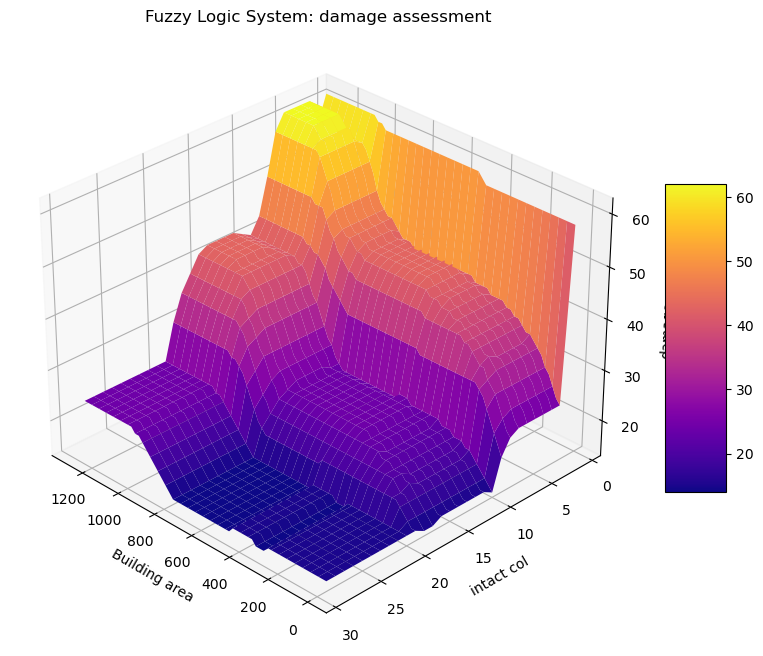

In [46]:
def area_vs_col(hight=2,v_d=0,tilt=0):
    buildingArea = np.arange(0, 1300, 20)
    col = np.arange(1, 30,1)
    col, buildingArea = np.meshgrid(col, buildingArea)
    output = np.empty_like(buildingArea)

    for i in range(col.shape[0]):
        for j in range(col.shape[1]):
            damage_sim.input['building_area']= buildingArea[i,j]
            damage_sim.input['intact_col'] = col[i,j]

            damage_sim.input['building_hight'] = hight
            damage_sim.input['ruble_percentage'] =v_d
            damage_sim.input['tilt'] = tilt
            damage_sim.compute()
            # print(damage_sim.output.get('damage'))
            output[i,j]= damage_sim.output.get('damage')*100 #to normalize the z axis when plotting and to make it more clear

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(buildingArea,col, output, cmap='plasma') 
    ax.azim =135
    # ax.elev = 15
    ax.set_xlabel('Building area')
    ax.set_ylabel('intact col')
    ax.set_zlabel('damage')
    ax.set_title('Fuzzy Logic System: damage assessment')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
area_vs_col()

> this figure shows that when the building area increases the damage becom more critical
---

## **Habitability**

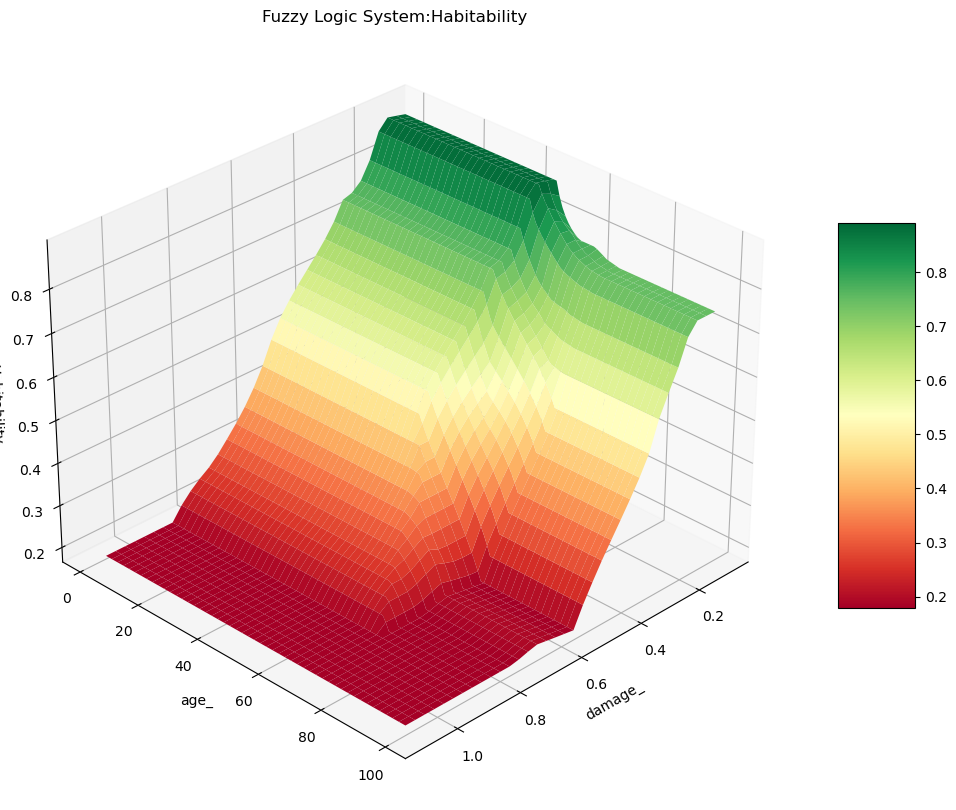

In [8]:
def Habitability():
    damage_ = np.arange(0.1, 1.1, 0.03)
    age_ = np.arange(1, 100,1)
    age_, damage_ = np.meshgrid(age_, damage_)
    output = np.empty_like(damage_)

    for i in range(age_.shape[0]):
        for j in range(age_.shape[1]):
            results_sim.input['damage_out']=damage_[i,j]
            results_sim.input['building_age']=age_[i,j]
            results_sim.compute()
            output[i,j]= results_sim.output.get('habitability') 

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(damage_,age_, output, cmap="RdYlGn") 
    ax.azim =45
    ax.set_xlabel('damage_')
    ax.set_ylabel('age_')
    ax.set_zlabel('Habitability')
    ax.set_title('Fuzzy Logic System:Habitability')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
Habitability()

---
## **Reparability**

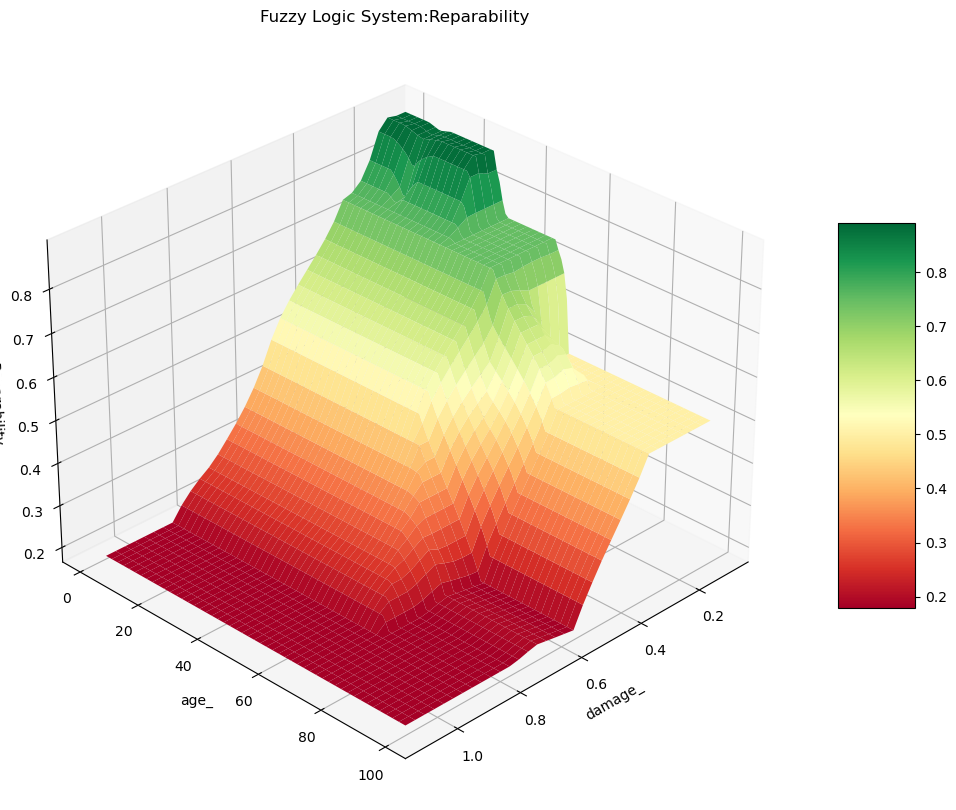

In [9]:
def Reparability():
    damage_ = np.arange(0.1, 1.1, 0.03)
    age_ = np.arange(1, 100,1)
    age_, damage_ = np.meshgrid(age_, damage_)
    output = np.empty_like(damage_)

    for i in range(age_.shape[0]):
        for j in range(age_.shape[1]):
            results_sim.input['damage_out']=damage_[i,j]
            results_sim.input['building_age']=age_[i,j]
            results_sim.compute()
            output[i,j]= results_sim.output.get('reparability') 

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(damage_,age_, output, cmap="RdYlGn") 
    ax.azim =45
    ax.set_xlabel('damage_')
    ax.set_ylabel('age_')
    ax.set_zlabel('Reparability')
    ax.set_title('Fuzzy Logic System:Reparability')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
Reparability()

# the end of the project